In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

(70000, 784) (70000,)


# Data preprocessing (10%)

Feature scaling

In [2]:
examples = y.shape[0]
y1 = y.reshape(1, examples)
X1 = X / 255
X1 = X1.T
print(X1.shape)
print(X1)
print(y1)
print(y1.shape)
print(y1.flatten())



(784, 70000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[['5' '0' '4' ... '4' '5' '6']]
(1, 70000)
['5' '0' '4' ... '4' '5' '6']


Select two classes

In [3]:
#TODO: select two classes (for example 2 and 4)


y1 = np.asarray(y1.flatten(), dtype=np.int64, order='C')
print(y1)

mycondition = np.where(((y1 == 1) | (y1 == 0)))
print(mycondition)
print(y1)

y2 = y1[mycondition]
X1 = X1.T
X1 = X1[mycondition]

print(mycondition)
print(X1)
print(y2)
print(X1.shape)
print(y2.shape)










[5 0 4 ... 4 5 6]
(array([    1,     3,     6, ..., 69984, 69993, 69994]),)
[5 0 4 ... 4 5 6]
[0 1 1 ... 1 0 1]
(array([    1,     3,     6, ..., 69984, 69993, 69994]),)
(array([    1,     3,     6, ..., 69984, 69993, 69994]),)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 1 1 ... 1 0 1]
(14780, 784)
(14780,)


Split the data into Train set and Test set

In [4]:
# TODO: Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)
from sklearn.utils import shuffle

X = X1
Y = y2

# Use shuffle on the train data
X, y = shuffle(X, Y)

spl = 0.8
N = len(Y)
sample = int(spl*N)

X = X.T
examples = y.shape[0]
y = y.reshape( examples, 1)



X_train, X_test = X[:,:sample], X[:,sample:]
Y_train, Y_test = y[:sample, ], y[sample:,]


Test yourself

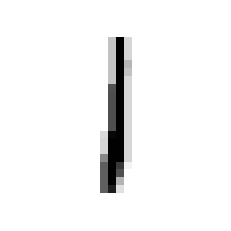

1

In [5]:
# Test yourself (Check that the classes you have selected are actually displayed)
%matplotlib inline
from numpy import random

i = random.randint(100)
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[i,0]

# Activation functions (10%)

In [6]:
#TODO: Sigmoid activation function
def sigmoid(z):
    result = 1/(1+np.exp(-z))
    return result

# Loss function (20%)

In [7]:
#TODO: Binary cross entropy
def log_loss(y_hat, y):
    '''
    Logistic loss, assuming a single value in y_hat and y.
    '''
    result = -y*np.log(y_hat)-(1-y)*np.log(1-y_hat)
    return result

# NN Parameters

In [8]:
input_layer = X_train.shape[0] # 28X28 = 784
hidden_layer = 64
learning_rate = 0.3
epochs = 20

# Weight and Bias Initialization

In [9]:
W1 = np.random.randn(hidden_layer, input_layer)
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(1, hidden_layer)
b2 = np.zeros((1, 1))

print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(64, 784)
(64, 1)
(1, 64)
(1, 1)


# Train (30%)

In [10]:
X = X_train
Y = Y_train
loss_list = []
epoch_list = []
numOfTraining = 10509

for i in range(epochs):
  avg_epoch_loss = 0
  for j in range(numOfTraining):
    # TODO :  Forward propagation
    
    Z1 = np.matmul(W1,X[:,j].reshape(X.shape[0], 1)) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = sigmoid(Z2)
    Yout = Y[j,]

    # TODO: Compute loss
    loss = np.squeeze(log_loss( A2, Yout))
    avg_epoch_loss = avg_epoch_loss + loss 

    # Back propagation
    dZ2 = (A2-Yout)
    dW2 = (1/numOfTraining)*np.matmul(dZ2, A1.T)
    db2 = (1/numOfTraining) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1/numOfTraining) * np.matmul(dZ1, X[:,j].reshape(X.shape[0], 1).T)
    db1 = (1/numOfTraining) * np.sum(dZ1, axis=1, keepdims=True)

    # TODO: Update weights
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

  avg_epoch_loss = avg_epoch_loss/numOfTraining
  loss_list.append(loss)
  epoch_list.append(i)
  print("Epoch", i," Loss:", avg_epoch_loss)

Epoch 0  Loss: 2.9052838203344837
Epoch 1  Loss: 2.1131718466118783
Epoch 2  Loss: 1.5360855640469429
Epoch 3  Loss: 1.133038802113694
Epoch 4  Loss: 0.856834590836768
Epoch 5  Loss: 0.6668869527107782
Epoch 6  Loss: 0.5340491775607618
Epoch 7  Loss: 0.4390098742151503
Epoch 8  Loss: 0.3692924511804469
Epoch 9  Loss: 0.3168722204510134
Epoch 10  Loss: 0.2765476836992984
Epoch 11  Loss: 0.24488489066850047
Epoch 12  Loss: 0.21956333452300736
Epoch 13  Loss: 0.1989777569458724
Epoch 14  Loss: 0.18199356725877064
Epoch 15  Loss: 0.16779322887648188
Epoch 16  Loss: 0.15577728857158343
Epoch 17  Loss: 0.14549909965262767
Epoch 18  Loss: 0.1366208945759848
Epoch 19  Loss: 0.12888370122617


# Visualization

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[array(0.21847108), array(0.14191614), array(0.10137521), array(0.07809834), array(0.06371182), array(0.05414484), array(0.04735338), array(0.04227004), array(0.03830575), array(0.03510963), array(0.03245979), array(0.03021089), array(0.02826522), array(0.02655543), array(0.02503386), array(0.02366592), array(0.02242584), array(0.02129401), array(0.02025518), array(0.01929727)]


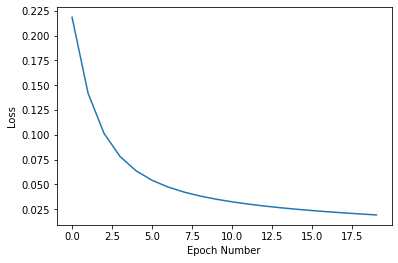

In [11]:
import matplotlib.pyplot as plt
print(epoch_list)
print(loss_list)
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_list)

# Test your performance (30%)

In [44]:
#TODO: Forward batch of examples
X = X_test
Y = Y_test

Z1 = np.matmul(W1, X) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2,A1) + b2
A2 = sigmoid(Z2)


predictions = np.zeros((1,Y.shape[0]))
labels = np.zeros((1,Y.shape[0]))

# Check your predictions against the test's labels
for i in range(Y.shape[0]):
  if (A2[0,i] > 0.5): 
    predictions[0,i] = 1
  labels[0,i] = Y[i,0]


# Print the confusion matrix In order to test your performance
print(confusion_matrix(predictions.T, labels.T))
print(classification_report(predictions.T, labels.T))


[[1282   31]
 [  87 1556]]
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1313
         1.0       0.98      0.95      0.96      1643

    accuracy                           0.96      2956
   macro avg       0.96      0.96      0.96      2956
weighted avg       0.96      0.96      0.96      2956



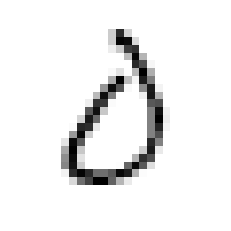

Real= 0 Predicted= 0


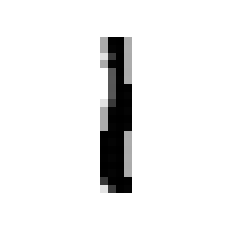

Real= 1 Predicted= 1


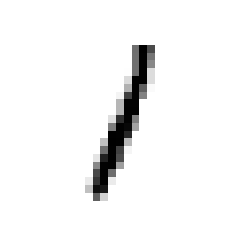

Real= 1 Predicted= 1


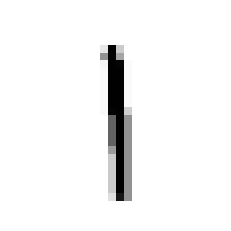

Real= 1 Predicted= 1


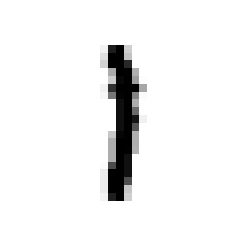

Real= 1 Predicted= 1


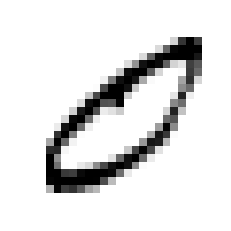

Real= 0 Predicted= 1


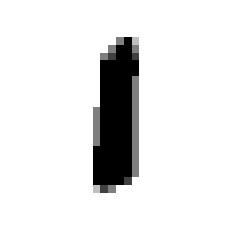

Real= 1 Predicted= 1


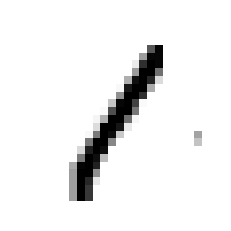

Real= 1 Predicted= 1


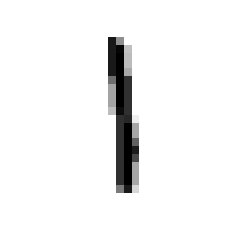

Real= 1 Predicted= 1


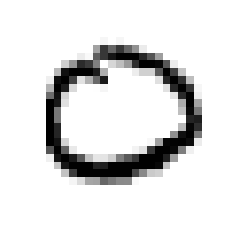

Real= 0 Predicted= 0
[[2 0]
 [1 7]]
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80         2
         1.0       1.00      0.88      0.93         8

    accuracy                           0.90        10
   macro avg       0.83      0.94      0.87        10
weighted avg       0.93      0.90      0.91        10



In [45]:
#TODO: SHOW VISUALLY RESULTS ON 10 TEST EXAMPLES
%matplotlib inline
from numpy import random

minipredictions = np.zeros((1,10))
minilabels = np.zeros((1,10))

for loo in range(10):
  i = random.randint(2000)
  plt.imshow(X_test[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
  plt.axis("off")
  plt.show()
  Y_test[i,0]

  Z1 = np.matmul(W1,X_test[:,i]) 
  A1 = sigmoid(Z1)
  Z2 = np.matmul(W2,A1) + b2
  A2 = sigmoid(Z2)
  Yout = Y[i,0]
  
  predicted = 1 if (np.squeeze(A2) > 0.5) else 0

  if(predicted == 1):
    minipredictions[0,loo] = 1
  minilabels[0,loo] = Y[i,0]

  print("Real=", Y_test[i,0], "Predicted=",predicted)
print(confusion_matrix(minipredictions.T, minilabels.T))
print(classification_report(minipredictions.T, minilabels.T))